In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
#Reading csv file
data = pd.read_csv("https://raw.githubusercontent.com/navidharni/Machine-Learning/main/Dataset/heart.csv")

In [3]:
#Standardization Function
def standardize(arr):
    return[(value - arr.mean())/arr.std() for value in arr]

In [4]:
#Sigmoid function
def hypothesis(theta,x):
    z= np.sum(theta*x)
    return 1/(1+np.e**(-1*z))

In [5]:
#cost function
def cost(theta,x,y):
    sum =0
    for i in range(len(x)):
        h_x = hypothesis(theta,x[i])
        sum += y[i]* np.log(h_x) + (1-y[i])*np.log(1- h_x)
    j_theta = -1 * sum/len(x)
    return j_theta

In [6]:
#Gradient Descent Iteration
def gdp(thetas_old,alpha,x,y):
    thetas_new = list()
    for j in range(len(thetas_old)):
        sum =0
        for i in range(len(x)):
            sum += (y[i] - hypothesis(thetas_old,x[i]))*x[i][j]
        thetas_new.append(thetas_old[j] + alpha * (sum/len(x)))
    return thetas_new

In [7]:
# Training model and mini-batch
def mini_batch(x,size):
    return [x[i:i + size] for i in range(0, len(x), size)]

def train(x,y,thetas,alpha,epochs,batch):
    err =[]
    if batch !=0:
        x_batch = mini_batch(x,batch)
        y_batch =  mini_batch(y,batch)
        x_batch = [btch.to_numpy() for btch in x_batch ]
        y_batch = [btch.to_numpy() for btch in y_batch]
    else:
        x_batch = [x.to_numpy()]
        y_batch = [y.to_numpy()]

    x = x.to_numpy()
    y = y.to_numpy()

    for i in range(epochs):
        for j in range(len(x_batch)):
            thetas = gdp(thetas,alpha,x_batch[j],y_batch[j])
        err.append(cost(thetas,x,y))
        if i== 500 or i == 1000:
          error_plot(err,f"Cost Function for {i} epoch,alpha = {alpha},and batch size = {batch}")
          print(f"alpha:{alpha} , epochs:{i}, batch: {batch}, \nthetas: {thetas}")
    error_plot(err,f"Cost Function for {epochs} epoch,alpha = {alpha},and batch size = {batch}")
    print(f"alpha:{alpha} , epochs:{epochs}, batch: {batch}\nthetas: {thetas}")

In [8]:
# Error plots setup
def error_plot(err, title):
    plt.plot(range(1,len(err)+1),err,color ='y')
    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.show()

The percentage of Class 0 and class 1: 
0    65.37
1    34.63
Name: chd, dtype: float64

Number of missing values : 
row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64
Categorical_variables: 
['famhist']


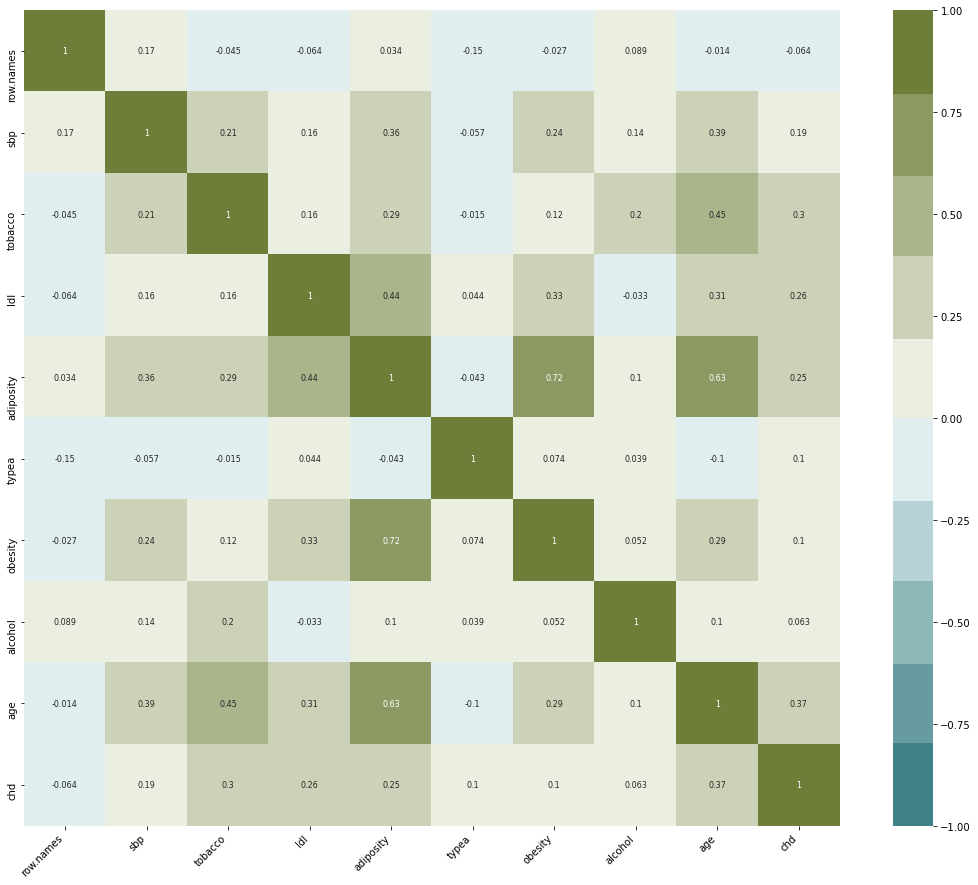

In [9]:
#EDA
# Percentage of each class 0 and 1?
print("The percentage of Class 0 and class 1: ")
print(round((data['chd'].value_counts())*100/data['row.names'].__len__(),2))

#Number of missing values?
print(f'\nNumber of missing values : \n{data.isnull().sum()}')

#How many categorical variables you have in your features?
cols = data.columns
num_cols = data._get_numeric_data().columns
categorical_val = list(set(cols) - set(num_cols))
print(f'Categorical_variables: \n{categorical_val}')

#Features with max correlation
corr = data.corr()
plt.figure(figsize = (19,15))
ax = sns.heatmap(
    corr,
    vmin =-1, vmax =1 , center =0,
    cmap = sns.diverging_palette(200,100,n=10),
    square =True,
    annot=True,
    annot_kws={"fontsize":8}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation =45,
    horizontalalignment = 'right'
)
plt.show()

In [10]:
#One-Hot-Encoding
encd = pd.get_dummies(data['famhist'])
data = data.drop('famhist', 'columns')
data = data.join(encd)
print("\nData Head after one-hot-encoding famhist column")

print(data.head())


Data Head after one-hot-encoding famhist column
   row.names  sbp  tobacco   ldl  adiposity  typea  obesity  alcohol  age  \
0          1  160    12.00  5.73      23.11     49    25.30    97.20   52   
1          2  144     0.01  4.41      28.61     55    28.87     2.06   63   
2          3  118     0.08  3.48      32.28     52    29.14     3.81   46   
3          4  170     7.50  6.41      38.03     51    31.99    24.26   58   
4          5  134    13.60  3.50      27.78     60    25.99    57.34   49   

   chd  Absent  Present  
0    1       0        1  
1    1       1        0  
2    0       0        1  
3    1       0        1  
4    1       0        1  


In [11]:
#Extracting the features and target variables and standardizing features
features = data.iloc[:,np.r_[1:9,10,11]].copy()
target = data.iloc[:,9].copy()

for feature in features.columns[:-2]:
    features.loc[:,feature] = standardize(features.loc[:,feature])

print(target)


0      1
1      1
2      0
3      1
4      1
      ..
457    0
458    1
459    0
460    0
461    1
Name: chd, Length: 462, dtype: int64


In [12]:
#Initalizing the thetas:
thetas = np.random.rand(len(features.columns))
print(thetas)

[0.02518806 0.2230425  0.68361677 0.17808443 0.19789219 0.84116013
 0.82413372 0.42996157 0.41722272 0.12063497]


In [13]:
#Training model with different alpha values and epochs
# alpha = 0.001; epoch = 500 , batch =462
#train(features,target,thetas, 0.001,500,462)
#alpha = 0.001, epoch = 1000, batch = 462
#train(features,target,thetas, 0.001,1000,462)
#alpha = 0.001, epoch = 10,000, batch = 462
#train(features,target,thetas, 0.001,10000,462)

# Alternate approach, to use the highest epoch and extract the plot from  for common learning rate
#train(features,target,thetas, 0.001,10000,462)

In [14]:
# alpha = 0.0001; epoch = 500 , batch =462
#train(features,target,thetas, 0.0001,500,462)
#alpha = 0.0001, epoch = 1000, batch = 462
#train(features,target,thetas, 0.0001,1000,462)
#alpha = 0.0001, epoch = 10,000, batch = 462
#train(features,target,thetas, 0.0001,10000,462)

# Alternate approach, to use the highest epoch and extract the plot from  for common learning rate
#train(features,target,thetas, 0.0001,10000,462)

In [15]:
# alpha = 0.001; epoch = 500 , batch =50
#train(features,target,thetas, 0.001,500,50)
#alpha = 0.001, epoch = 1000, batch = 50
#train(features,target,thetas, 0.001,1000,50)
#alpha = 0.001, epoch = 10,000, batch = 50
#train(features,target,thetas, 0.001,10000,50)

# Alternate approach, to use the highest epoch and extract the plot from  for common learning rate
#train(features,target,thetas, 0.001,10000,50)

In [16]:
# alpha = 0.0001; epoch = 500 , batch =50
#train(features,target,thetas, 0.0001,500,50)
#alpha = 0.0001, epoch = 1000, batch = 50
#train(features,target,thetas, 0.0001,1000,50)
#alpha = 0.0001, epoch = 10,000, batch = 50
#train(features,target,thetas, 0.0001,10000,50)

# Alternate approach, to use the highest epoch and extract the plot from  for common learning rate
#train(features,target,thetas, 0.0001,10000,50)

In [17]:
logistic_regression = LogisticRegression().fit(features,target)
print("Implementation from sklearn, thetas:")
print(np.hstack((logistic_regression.intercept_[:,None],logistic_regression.coef_)))

Implementation from sklearn, thetas:
[[-0.79563381  0.13302925  0.36177752  0.35561385  0.1427984   0.37976294
  -0.2559585   0.00367413  0.64831799 -0.45131005  0.45132882]]
